In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('GOOG.csv',date_parser = True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [3]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4290,2021-09-02,2918.989990,2926.500000,2882.129883,2884.379883,2884.379883,1092200
4291,2021-09-03,2882.919922,2907.540039,2870.100098,2895.500000,2895.500000,955200
4292,2021-09-07,2894.989990,2916.479980,2890.820068,2910.379883,2910.379883,758500
4293,2021-09-08,2907.870117,2911.020020,2884.000000,2897.669922,2897.669922,774300
4294,2021-09-09,2897.669922,2913.219971,2888.679932,2898.270020,2898.270020,739928


In [4]:
data_training = data [data['Date']<'2019-01-01'].copy()

In [5]:
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...,...
3612,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3613,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3614,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3615,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800


In [6]:
data_test = data [data['Date']>='2019-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
4290,2021-09-02,2918.989990,2926.500000,2882.129883,2884.379883,2884.379883,1092200
4291,2021-09-03,2882.919922,2907.540039,2870.100098,2895.500000,2895.500000,955200
4292,2021-09-07,2894.989990,2916.479980,2890.820068,2910.379883,2910.379883,758500
4293,2021-09-08,2907.870117,2911.020020,2884.000000,2897.669922,2897.669922,774300


In [7]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,49.813290,51.835709,47.800831,49.982655,44871361
1,50.316402,54.336334,50.062355,53.952770,22942874
2,55.168217,56.528118,54.321388,54.495735,18342897
3,55.412300,55.591629,51.591621,52.239197,15319808
4,52.284027,53.798351,51.746044,52.802086,9232276


In [8]:
scalar = MinMaxScaler()
training_data = scalar.fit_transform(training_data)
training_data

array([[3.30298164e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577158e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885876e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22151352e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54669035e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70461017e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79972283e-02]])

In [9]:
x_train = []
y_train = []

In [10]:
training_data.shape[0]

3617

In [11]:
for i in range(60, training_data.shape[0]):
    x_train.append(training_data[i-60:i])
    y_train.append(training_data[i,0])

In [12]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train.shape, y_train.shape

((3557, 60, 5), (3557,))

In [14]:
y_train

array([0.03508488, 0.03313572, 0.03193279, ..., 0.79219711, 0.81877719,
       0.8198741 ])

In [15]:
y_train[0]

0.03508488283148054

In [45]:
x_train

array([[[3.30298164e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
         5.43577158e-01],
        [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
         2.77885876e-01],
        [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
         2.22151352e-01],
        ...,
        [3.05463616e-02, 2.99154223e-02, 2.87421258e-02, 2.80807737e-02,
         2.69022455e-01],
        [2.91476913e-02, 2.88240316e-02, 2.91816917e-02, 2.77373761e-02,
         2.58801782e-01],
        [2.85197221e-02, 3.33972717e-02, 2.96959051e-02, 3.39348522e-02,
         3.64401617e-01]],

       [[7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
         2.77885876e-01],
        [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
         2.22151352e-01],
        [4.91367646e-03, 4.01532941e-03, 3.15578542e-03, 1.98679178e-03,
         1.85522815e-01],
        ...,
        [2.91476913e-02, 2.88240316e-02, 2.91816917e-02, 2.77373761e-02,
        

# Building LSTM 

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [17]:
x_train.shape[1], 5

(60, 5)

In [18]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))


In [19]:
regressior.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 120)           9

In [20]:
regressior.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
regressior.fit(x_train, y_train, epochs=30, batch_size = 50)

Epoch 1/30
72/72 [==============================] - 50s 504ms/step - loss: 0.0337
Epoch 2/30
72/72 [==============================] - 36s 502ms/step - loss: 0.0087
Epoch 3/30
72/72 [==============================] - 36s 497ms/step - loss: 0.0056
Epoch 4/30
72/72 [==============================] - 38s 534ms/step - loss: 0.0044
Epoch 5/30
72/72 [==============================] - 38s 531ms/step - loss: 0.0035
Epoch 6/30
72/72 [==============================] - 37s 510ms/step - loss: 0.0029
Epoch 7/30
72/72 [==============================] - 38s 526ms/step - loss: 0.0027
Epoch 8/30
72/72 [==============================] - 38s 533ms/step - loss: 0.0024
Epoch 9/30
72/72 [==============================] - 39s 545ms/step - loss: 0.0023
Epoch 10/30
72/72 [==============================] - 40s 549ms/step - loss: 0.0021
Epoch 11/30
72/72 [==============================] - 37s 519ms/step - loss: 0.0021
Epoch 12/30
72/72 [==============================] - 37s 521ms/step - loss: 0.0020
Epoch 13/30
7

# preparing Test Dataset

In [22]:
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
4290,2021-09-02,2918.989990,2926.500000,2882.129883,2884.379883,2884.379883,1092200
4291,2021-09-03,2882.919922,2907.540039,2870.100098,2895.500000,2895.500000,955200
4292,2021-09-07,2894.989990,2916.479980,2890.820068,2910.379883,2910.379883,758500
4293,2021-09-08,2907.870117,2911.020020,2884.000000,2897.669922,2897.669922,774300


In [23]:
past_60_days = data_training.tail(60)

In [24]:
past_60_days

,Date,Open,High,Low,Close,Adj Close,Volume
3557,2018-10-04,1195.329956,1197.510010,1155.576050,1168.189941,1168.189941,2209500
3558,2018-10-05,1167.500000,1173.500000,1145.119995,1157.349976,1157.349976,1184300
3559,2018-10-08,1150.109985,1168.000000,1127.364014,1148.969971,1148.969971,1932400
3560,2018-10-09,1146.150024,1154.349976,1137.572021,1138.819946,1138.819946,1308700
3561,2018-10-10,1131.079956,1132.170044,1081.130005,1081.219971,1081.219971,2675700
3562,2018-10-11,1072.939941,1106.400024,1068.270020,1079.319946,1079.319946,2949000
3563,2018-10-12,1108.000000,1115.000000,1086.401978,1110.079956,1110.079956,2101300
3564,2018-10-15,1108.910034,1113.446045,1089.000000,1092.250000,1092.250000,1372400
3565,2018-10-16,1104.589966,1124.219971,1102.500000,1121.280029,1121.280029,1928500
3566,2018-10-17,1126.459961,1128.989990,1102.189941,1115.689941,1115.689941,1467200


In [25]:
df = past_60_days.append(data_test, ignore_index=True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [26]:
inputs = scalar.transform(df)
inputs

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.02667489],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.0142533 ],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331748],
       ...,
       [2.32940653, 2.342852  , 2.36677807, 2.34758652, 0.0090942 ],
       [2.33995027, 2.33838837, 2.36110045, 2.3371558 , 0.00928564],
       [2.33160034, 2.34018687, 2.36499644, 2.33764828, 0.00886918]])

In [46]:
x_test = []
y_test = []

In [47]:
for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])

In [48]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((678, 60, 5), (678,))

In [49]:
y_pred = regressior.predict(x_test)

In [50]:
y_pred

array([[[  0.8824838 ],
        [  0.88847786],
        [  0.8838004 ],
        ...,
        [  0.82325935],
        [  0.8219241 ],
        [  0.82211804]],

       [[  0.8721602 ],
        [  0.8827704 ],
        [  0.8807453 ],
        ...,
        [  0.8220542 ],
        [  0.82224256],
        [  0.82309246]],

       [[  0.8632167 ],
        [  0.8794586 ],
        [  0.87389505],
        ...,
        [  0.8224256 ],
        [  0.82326674],
        [  0.8241067 ]],

       ...,

       [[  2.4914231 ],
        [  1.030549  ],
        [  0.9640435 ],
        ...,
        [ 57.9152    ],
        [ 32.238842  ],
        [100.236     ]],

       [[  2.4962153 ],
        [  1.030229  ],
        [  0.9635341 ],
        ...,
        [ 59.35162   ],
        [ 32.188335  ],
        [ 99.44039   ]],

       [[  2.5085988 ],
        [  1.0292648 ],
        [  0.9638497 ],
        ...,
        [ 58.73898   ],
        [ 32.10551   ],
        [ 99.68114   ]]], dtype=float32)

In [31]:
scalar.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162615e-08])

In [32]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [51]:
y_pred = y_pred*scale
y_test = y_test*scale

In [52]:
y_pred.shape, y_test.shape

((678, 60, 1), (678,))

In [53]:
y_test

array([ 967.16020601,  991.59019901,  983.18016501, 1022.09019901,
       1026.70018401, 1032.24022301, 1018.25023301, 1013.77025301,
        997.51024301, 1000.76024301, 1030.59019901, 1030.06017001,
       1050.59019901, 1038.59019901, 1027.94017501, 1027.07017901,
       1035.59019901, 1030.70018401, 1023.27025301, 1019.02025301,
       1053.59019901, 1062.99022301, 1063.25023301, 1075.43016501,
       1090.16014501, 1054.75023301, 1037.59019901, 1047.54015001,
       1057.39024801, 1075.58018901, 1068.64024801, 1080.67015501,
       1060.59019901, 1070.58018901, 1061.43016501, 1051.49022301,
       1066.59019901, 1056.34019901, 1057.54015001, 1061.89024801,
       1075.49022301, 1097.58018901, 1100.65025801, 1113.08018901,
       1106.31017001, 1077.32017901, 1095.04015001, 1128.85020901,
       1151.23521901, 1145.10020901, 1143.97020401, 1133.89024801,
       1139.40025801, 1147.94017501, 1166.59019901, 1176.91014501,
       1147.52025301, 1149.12022801, 1136.09019901, 1122.13023

In [54]:
import numpy as np
np.ndim(y_pred)

3

In [55]:
import numpy as np
np.ndim(y_test)

1

In [56]:
# y_pred= y_pred.reshape(-1,)
# y_pred.shape

In [57]:
y_pred_new= []
for i in y_pred:
    y_pred_new.append(i[0][0])
    
y_pred_new = np.array(y_pred_new)
len(y_pred_new)

678

In [60]:
y_pred_new

array([1078.0336 , 1065.4224 , 1054.4971 , 1051.7115 , 1018.4108 ,
       1000.69775, 1020.34235, 1017.49554, 1027.1707 , 1031.2429 ,
       1016.91046, 1015.18463, 1018.5529 , 1010.3    ,  997.4642 ,
       1006.05835,  983.4079 ,  971.99304,  955.05914,  994.2007 ,
        996.6333 ,  991.3129 ,  973.37714,  980.1166 , 1002.6203 ,
       1005.5299 ,  992.6572 ,  977.93835,  973.1762 ,  975.8274 ,
        982.3213 ,  986.46387,  969.38354,  951.15204,  971.4333 ,
        964.8518 ,  974.02655,  975.61536,  990.0692 , 1005.10535,
       1007.6683 , 1027.0238 ,  996.64233,  979.64014,  977.808  ,
        969.5936 ,  981.5188 ,  993.38214,  991.4639 ,  978.0408 ,
        961.2451 ,  964.06604,  963.41925,  950.3192 ,  928.6833 ,
        927.2492 ,  951.9331 ,  961.7705 ,  974.96277,  972.7104 ,
        967.6361 ,  964.4158 ,  980.33203,  991.7901 ,  997.5121 ,
        999.6659 ,  992.4402 ,  985.7069 ,  977.4071 ,  990.70776,
       1004.5106 , 1005.6105 , 1015.9254 , 1000.0879 ,  998.73

# Visualization

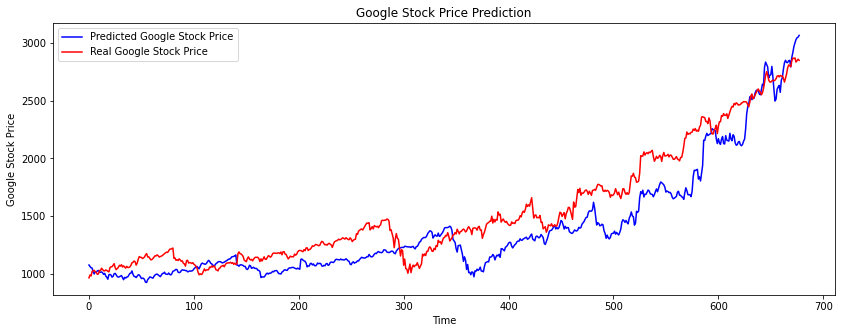

In [61]:
plt.figure(figsize=(14,5))
plt.plot(y_pred_new, color = 'blue', label = 'Predicted Google Stock Price')
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

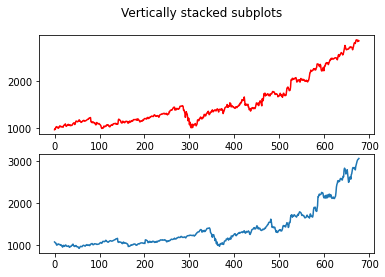

In [42]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot( y_test, color= 'red')
axs[1].plot(y_pred_new)

In [43]:
score = regressior.evaluate(x_test, y_test) 

score

22/22 [==============================] - 5s 105ms/step - loss: 2611625.2500


2611625.25